# Optimization I --- Project 1 : Linear Programming

### Completed by: Rahul Singla, Aatheep Gurubaran, Kaushik Kumaran, Rohan Garg

### Importing all the Pandas Packages we will be using for this project : numpy, gurobipy, and pandas

In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd
from matplotlib import pyplot as plt
np.set_printoptions(precision=3)

### Opening the data set and storing it in a data frame

In [2]:
df = pd.read_csv('ROI_data.csv')
df

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


## Defining what the constraints are :

### 1.) Our total marketing budget cannot exceed $10M

#### $ x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_{10} < 10 $ <br>

where:

$x_1$ = Print

$x_2$ = TV

$x_3$ = SEO

$x_4$ = AdWords

$x_5$ = Facebook

$x_6$ = LinkedIn

$x_7$ = Instagram

$x_8$ = Snapchat

$x_9$ = Twitter

$x_{10}$ = Email

### 2.) The amount invested in print ($x_1$) and TV ($x_2$) should not be more than the amount spent on Facebook ($x_5$) and Email ($x_9$)

$ x_1 + x_2 < x_5 + x_9 $<br>

### 3.) The total amount used in social media (Facebook ($x_5$), LinkedIn ($x_6$), Instagram ($x_7$), Snapchat ($x_8$), and Twitter ($x_9$) should be at least twice of SEO ($x_3$), and AdWords ($x_4$)
$ x_5 + x_6 + x_7 + x_8 + x_9 > 2 (x_3 + x_4) $<br>

### 4.) For each platform, the amount invested should be no more than $3M

$ x_1 < 3 $<br>
$ x_2 < 3 $<br>
$ x_3 < 3 $<br>
$ x_4 < 3 $<br>
$ x_5 < 3 $<br>
$ x_6 < 3 $<br>
$ x_7 < 3 $<br>
$ x_8 < 3 $<br>
$ x_9 < 3 $<br>
$ x_{10} < 3 $<br>


***

### Restructuring the constraints, we get: 

### 1.)
$ x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_{10} < 10 $

***

### 2.)
$ x_1 + x_2 - x_5 - x_9 < 0 $

***

### 3.)
$ 2x_3 + 2x_4 - x_5 - x_6 - x_7 - x_8 - x_9 < 0  $

***

### 4.)
$ x_1 < 3 $<br>
$ x_2 < 3 $<br>
$ x_3 < 3 $<br>
$ x_4 < 3 $<br>
$ x_5 < 3 $<br>
$ x_6 < 3 $<br>
$ x_7 < 3 $<br>
$ x_8 < 3 $<br>
$ x_9 < 3 $<br>
$ x_{10} < 3 $<br>

---

### Objective function we are trying to maximize :
$ 0.031x_1 + 0.049x_2 + 0.024x_3 + 0.039x_4 + 0.016x_5 + 0.024x_6 + 0.046x_7 + 0.026x_8 + 0.033x_9 + 0.044x_{10} $

In [3]:
df.iloc[0, 1:]

Print        0.031
TV           0.049
SEO          0.024
AdWords      0.039
Facebook     0.016
LinkedIn     0.024
Instagram    0.046
Snapchat     0.026
Twitter      0.033
Email        0.044
Name: 0, dtype: object

# Question #3.) -- First ROI data

### Formulating the marketing budget allocation problem as a linear program

In [4]:
obj = np.array(df.iloc[0, 1:])                    # objective vector defined above

# initializing the constraint matrix  
A = np.zeros((13, 10))                            # we have 13 equations and 20 variables

A[0,:] = 1                                        # Constraint #1
A[1,:] = [1, 1, 0, 0, -1, 0, 0, 0, 0, -1]         # Constraint #2
A[2, 2:9] = [2, 2, -1, -1, -1, -1, -1]            # Constraint #3
A[3:13,:] = np.identity(10)                       # Constraint #4

b = np.array([10, 0, 0] + [3] * 10)               # Defining the limits for all 4 constraints
sense = np.array(['<'] * 13)                      # Defining the direction for all the constraints

print("The final initial constraint matrix is: \n\n", A)
print("\n--------------------------------------------")
print("\nThe vector defining the limits for all the constraints is: \n\n", b)
print("\n--------------------------------------------")
print("\nThe vector defining the direction for all the constraints is: \n\n", sense)
print("\n--------------------------------------------")

The final initial constraint matrix is: 

 [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0.  2.  2. -1. -1. -1. -1. -1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]

--------------------------------------------

The vector defining the limits for all the constraints is: 

 [10  0  0  3  3  3  3  3  3  3  3  3  3]

--------------------------------------------

The vector defining the direction for all the constraints is: 

 ['<' '<' '<' '<' '<' '<' '<' '<' '<' '<' '<' '<' '<']

--------------------------------------------


### Using gurobi to find the optimal budget allocation

In [5]:
ojModel = gp.Model()

ojModX = ojModel.addMVar(len(obj))

ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)
ojModel.setMObjective(None, obj, 0, sense=gp.GRB.MAXIMIZE)

ojModel.Params.OutputFlag = 0
ojModel.optimize()                                     # solve the LP

Academic license - for non-commercial use only - expires 2022-09-15
Using license file C:\Users\rohan\gurobi.lic


In [6]:
objective_value1 = ojModel.objVal
print(round(objective_value1, 3),"Million")

0.456 Million


### The max profit realizeable with the given constraints and First ROI    
### = $0.456 Million

----

### The breakdown for each marketing medium for Investment 1 ( First ROI ) is as follows :

In [7]:
investment1 = ojModX.x
print(pd.Series(investment1, index = df.iloc[0, 1:].index))

Print        0.0
TV           3.0
SEO          0.0
AdWords      1.0
Facebook     0.0
LinkedIn     0.0
Instagram    3.0
Snapchat     0.0
Twitter      0.0
Email        3.0
dtype: float64


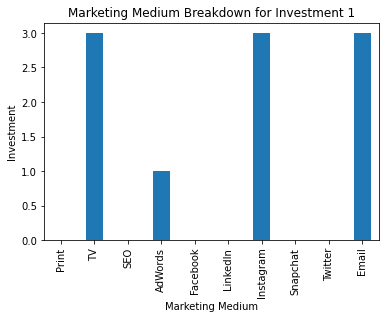

In [8]:
pd.Series(investment1, index = df.iloc[0, 1:].index).plot(kind = 'bar')
plt.xlabel("Marketing Medium")
plt.ylabel("Investment")
plt.title("Marketing Medium Breakdown for Investment 1")
plt.show()

---

# Question #4.) -- Second ROI Data


### Objective function we are trying to maximize has changed to :

$ 0.049x_1 + 0.023x_2 + 0.024x_3 + 0.039x_4 + 0.044x_5 + 0.046x_6 + 0.026x_7 + 0.019x_8 + 0.037x_9 + 0.026x_{10} $

In [9]:
df.iloc[1, 1:]

Print        0.049
TV           0.023
SEO          0.024
AdWords      0.039
Facebook     0.044
LinkedIn     0.046
Instagram    0.026
Snapchat     0.019
Twitter      0.037
Email        0.026
Name: 1, dtype: object

In [10]:
# only objective was updated
obj = np.array(df.iloc[1, 1:])

### Note that ALL the constraints have stayed exactly the same

### Using gurobi to find the optimal budget allocation

In [11]:
ojModel = gp.Model()

ojModX = ojModel.addMVar(len(obj))

ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

ojModel.Params.OutputFlag = 0
ojModel.optimize()                                           # solve the LP

In [12]:
objective_value2 = ojModel.objVal
print(round(objective_value2, 3),"M")

0.456 M


### The max profit realizeable with the given constraints and ROI    
### = $0.456 Million

---

### The breakdown for each marketing medium for Investment 2 is as follows :

In [13]:
investment2 = ojModX.x
print(pd.Series(investment2, index = df.iloc[0, 1:].index))

Print        3.0
TV           0.0
SEO          0.0
AdWords      1.0
Facebook     3.0
LinkedIn     3.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
Email        0.0
dtype: float64


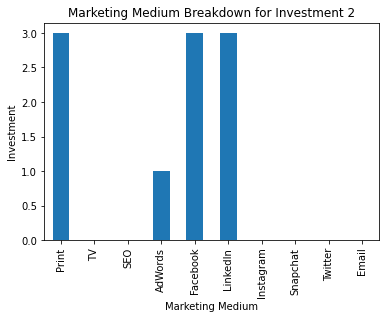

In [31]:
pd.Series(investment2, index = df.iloc[0, 1:].index).plot(kind = 'bar')
plt.xlabel("Marketing Medium")
plt.ylabel("Investment")
plt.title("Marketing Medium Breakdown for Investment 2")
plt.show()

---

# Question #5.)

### Comparing the two optimal allocations from the two different ROI estimates (Investment 1 & Investment 2) :

In [15]:
print("Difference in investments\n")

print(pd.Series(investment2 - investment1, index = df.iloc[0, 1:].index))

Difference in investments

Print        3.0
TV          -3.0
SEO          0.0
AdWords      0.0
Facebook     3.0
LinkedIn     3.0
Instagram   -3.0
Snapchat     0.0
Twitter      0.0
Email       -3.0
dtype: float64


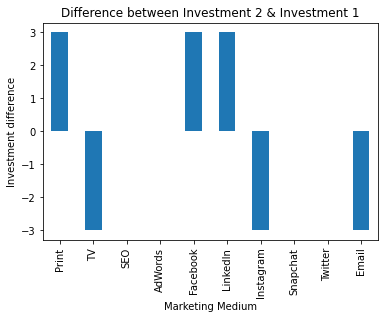

In [16]:
pd.Series(investment2 - investment1, index = df.iloc[0, 1:].index).plot(kind = 'bar')
plt.xlabel("Marketing Medium")
plt.ylabel("Investment difference")
plt.title("Difference between Investment 2 & Investment 1")
plt.show()

> ###  --------> No, the allocations from the two different ROI estimates are not EXACTLY the same
> ###  --------> However, they both do allocate the same amount for SEO, AdWords, Snapchat, & Twitter

### Finding the objective value using the first ROI data and second allocation

In [17]:
new_obj = np.dot(investment2, np.array(df.iloc[0, 1:]))
print("Objective value with second allocation and first ROI is $", new_obj, "M")
print("Reduction is $", round(objective_value1 - new_obj, 3), "M")

Objective value with second allocation and first ROI is $ 0.252 M
Reduction is $ 0.204 M


### The objective value would be $0.204 M lower relative to the optimal objective using the first ROI data and first allocation 

---

### Finding the objective value using the second ROI and first allocation

In [18]:
new_obj = np.dot(investment1, np.array(df.iloc[1, 1:]))
print("Objective value with first allocation and second ROI is $", round(new_obj, 3), "M")
print("Reduction is $", round(objective_value2 - new_obj, 3), "M")

Objective value with first allocation and second ROI is $ 0.264 M
Reduction is $ 0.192 M


### The objective value would be $0.192 M lower relative to the optimal objective using the first ROI data and first allocation

---

### Determining whether the third constraint is useful

In [19]:
#Without 3rd constraint
obj = np.array(df.iloc[0, 1:])                         # objective vector

A = np.zeros((3, 10))                                  # initialize constraint matrix

A[0,:] = 1                                             # Constraint #1
A[1,:] = [1, 1, 0, 0, -1, 0, 0, 0, 0, -1]              # Constraint #2
A[2, 2:9] = [2, 2, -1, -1, -1, -1, -1]                 # Constraint #4

b = np.array([10, 0, 0])                               # Defining the limits for all 3 constraints
sense = np.array(['<'] * 3)                            # Defining the direction for all the constraints

print("The final initial constraint matrix is: \n\n", A)
print("\n--------------------------------------------")
print("\nThe vector defining the limits for all the constraints is: \n\n", b)
print("\n--------------------------------------------")
print("\nThe vector defining the direction for all the constraints is: \n\n", sense)
print("\n--------------------------------------------")

The final initial constraint matrix is: 

 [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0.  2.  2. -1. -1. -1. -1. -1.  0.]]

--------------------------------------------

The vector defining the limits for all the constraints is: 

 [10  0  0]

--------------------------------------------

The vector defining the direction for all the constraints is: 

 ['<' '<' '<']

--------------------------------------------


### Using gurobi to find the optimal budget allocation

In [20]:
ojModel = gp.Model()

ojModX = ojModel.addMVar(len(obj))

ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

ojModel.Params.OutputFlag = 0
ojModel.optimize()                                # solve the LP

In [21]:
objective_value3 = ojModel.objVal
print(round(objective_value3, 3),"Million")

0.465 Million


### The max profit realizeable without the third constraint 
### = $0.465 Million

In [22]:
print(pd.Series(ojModX.x, index = df.iloc[0, 1:].index))
print("Max profit - $", round(ojModel.objVal, 3),"M")

Print        0.0
TV           5.0
SEO          0.0
AdWords      0.0
Facebook     0.0
LinkedIn     0.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
Email        5.0
dtype: float64
Max profit - $ 0.465 M


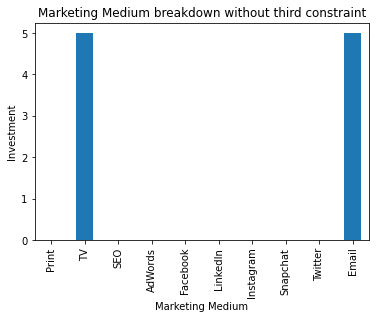

In [23]:
pd.Series(ojModX.x, index = df.iloc[0, 1:].index).plot(kind = 'bar')
plt.xlabel("Marketing Medium")
plt.ylabel("Investment")
plt.title("Marketing Medium breakdown without third constraint")
plt.show()

### Thus, it can be observed that without the 3rd constraint, the organization will be inclined to invest heavily into just TV and email marketing, completely ignoring the other channels. 


*Although this seems to provided a marginally higher ROI, this might end up being harmful in the long run, for the following reasons:*
1. Although TV and Emails have the best ROI, after a point, marketing campaigns on a medium will be saturated, with the new customers obtained through that medium drying up, thereby reducing the ROI and making it inefficient.


2. Other social media end up basically being untapped potential, where the people exclusively on these specific media are not targeted, who might actually be very relevant to the firm's customer base


3. Investment into a single or limited number of streams is a high risk, high benefit approach, which might pay off handsomely in stock returns and some such fields, but has a very high change of failing, due to a multitude of reasons such as inaccessibility of said medium, public disinterest in the medium and so on, which might cause severe losses

# Question #6.)

### Exploring how much the optimal allocation would change based on changes in the ROI data

In [24]:
obj = np.array(df.iloc[0, 1:]) # objective vector

# we have 10 variables and 13 equations
A = np.zeros((13, 10)) # initialize constraint matrix
A[0,:] = 1 # budget constraint
A[1,:] = [1, 1, 0, 0, -1, 0, 0, 0, 0, -1]
A[2, 2:9] = [2, 2, -1, -1, -1, -1, -1]
A[3:13,:] = np.identity(10)
b = np.array([10, 0, 0] + [3] * 10)
sense = np.array(['<'] * 13)

ojModel = gp.Model()

ojModX = ojModel.addMVar(len(obj))

ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

ojModel.Params.OutputFlag = 0
ojModel.optimize() # solve the LP

roi = pd.DataFrame(data = np.zeros((10,2)), columns = ['min_roi', 'max_roi'], index = df.iloc[0, 1:].index)

roi['min_roi'] = ojModX.SAObjLow
roi['max_roi'] = ojModX.SAObjUp

### Below is a table listing how much we could increase or decrease each advertising's ROI and still result in the same optimal allocation found in Question #3.)

In [25]:
roi

,min_roi,max_roi
Print,-inf,0.049
TV,0.039,0.062
SEO,-inf,0.039
AdWords,0.033,0.046
Facebook,-inf,0.029
LinkedIn,-inf,0.039
Instagram,0.039,inf
Snapchat,-inf,0.039
Twitter,-inf,0.039
Email,0.029,inf


* It seems that in terms of decreasing each advertising ROI, the mediums "Print", "SEO", "Facebook", "LinkedIn", "Snapchat", and "Twitter" could be decreased infinitely, and the result would still be the same optimal allocation.


* Regarding increasing each advertising ROI, the mediums "Instagram" and "Email" could be increased infinitely, and the result would still be the same optimal allocation

# Question #7.)

### Determining the optimal allocation for each month based on the monthly ROI given for next year

In [26]:
monthly_roi = pd.read_csv('roi_mat.csv')
monthly_roi

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [27]:
month = monthly_roi.columns[0]

In [28]:
budget_constrain = 10
roi_monthwise = np.zeros(12)
month_no = range(1, 13, 1)

for i in range(12):
    
    # initialize constraint matrix
    A = np.zeros((13, 10)) # initialize constraint matrix
    A[0,:] = 1                                         # Constraint #1
    A[1,:] = [1, 1, 0, 0, -1, 0, 0, 0, 0, -1]          # Constraint #2
    A[2, 2:9] = [2, 2, -1, -1, -1, -1, -1]             # Constraint #3
    A[3:13,:] = np.identity(10)                        # Constraint #4

    b = np.array([10, 0, 0] + [3] * 10)                # Defining the limits for all 4 constraints
    sense = np.array(['<'] * 13)                       # Defining the direction for all the constraints

    obj = np.array(monthly_roi.iloc[i, 1:]) / 100      # objective vector

    ojModel = gp.Model()

    ojModX = ojModel.addMVar(len(obj))

    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

    ojModel.Params.OutputFlag = 0
    ojModel.optimize() # solve the LP
    print("\n\n ROI after", monthly_roi[month].iloc[i], " - $", round(ojModel.objVal, 3), "M\n")
    roi_monthwise[i] = ojModel.objVal
    print(ojModX.x)
    
    # Updating the budget constraint. Adding 50% to the returns back to marketing budget
    budget_constrain = budget_constrain + (ojModel.objVal/2)



 ROI after January  - $ 0.373 M

[3.    0.    0.    1.333 0.    0.    2.667 0.    0.    3.   ]


 ROI after February  - $ 0.399 M

[3.    0.    0.    2.333 3.    0.    0.    0.    1.667 0.   ]


 ROI after March  - $ 0.4 M

[0. 0. 0. 3. 0. 3. 1. 0. 3. 0.]


 ROI after April  - $ 0.393 M

[0. 0. 0. 3. 0. 3. 3. 0. 1. 0.]


 ROI after May  - $ 0.404 M

[1. 0. 0. 0. 0. 0. 3. 0. 3. 3.]


 ROI after June  - $ 0.416 M

[3. 0. 0. 0. 0. 0. 3. 0. 1. 3.]


 ROI after July  - $ 0.42 M

[0. 0. 0. 3. 1. 0. 3. 0. 3. 0.]


 ROI after August  - $ 0.429 M

[2.5 0.  0.  1.5 0.  0.  0.  0.  3.  3. ]


 ROI after September  - $ 0.395 M

[0.5 0.  0.  3.  0.  3.  0.  0.  3.  0.5]


 ROI after October  - $ 0.365 M

[0. 0. 0. 3. 0. 3. 3. 0. 0. 1.]


 ROI after November  - $ 0.434 M

[3. 0. 0. 1. 0. 0. 3. 0. 0. 3.]


 ROI after December  - $ 0.424 M

[3. 2. 0. 0. 3. 0. 0. 0. 0. 2.]


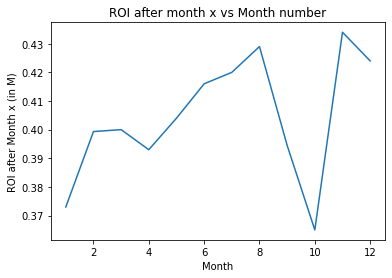

In [29]:
plt.plot(month_no, roi_monthwise)
plt.xlabel("Month")
plt.ylabel("ROI after Month x (in M)")
plt.title("ROI after month x vs Month number")
plt.show()

# Question #8.)

### Determining whether the allocation we found is stable.

### A *stable budget* is defined as a monthly allocation such that for each platform, the monthly change in spending is no more than $1M. 

In [30]:
budget_constrain = 10

for i in range(12):
    
    # we have 10 variables and 13 equations
    A = np.zeros((13, 10)) # initialize constraint matrix
    A[0,:] = 1 # budget constraint
    A[1,:] = [1, 1, 0, 0, -1, 0, 0, 0, 0, -1]
    A[2, 2:9] = [2, 2, -1, -1, -1, -1, -1]
    A[3:13,:] = np.identity(10)
    b = np.array([budget_constrain, 0, 0] + [3] * 10)
    sense = np.array(['<'] * 13)
    obj = np.array(monthly_roi.iloc[i, 1:]) / 100 # objective vector

    ojModel = gp.Model()

    ojModX = ojModel.addMVar(len(obj))

    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

    ojModel.Params.OutputFlag = 0
    ojModel.optimize() # solve the LP
    
    if not i == 0:
        if max(np.abs(investment - ojModX.x)) >= 1:
            print ("\n\n From ", monthly_roi[month].iloc[i-1], "to", monthly_roi[month].iloc[i], ",", 
                   "the change is more than $1M -- Allocation is NOT stable")
            print(investment - ojModX.x)
    investment = ojModX.x
    
    budget_constrain = budget_constrain + (ojModel.objVal/2)



 From  January to February , the change is more than $1M -- Allocation is NOT stable
[ 0.     0.     0.    -1.062 -3.     0.     2.667  0.    -1.791  3.   ]


 From  February to March , the change is more than $1M -- Allocation is NOT stable
[ 3.     0.     0.    -0.604  3.    -3.    -1.39   0.    -1.209  0.   ]


 From  March to April , the change is more than $1M -- Allocation is NOT stable
[ 0.     0.     0.     0.     0.     0.    -1.61   0.     1.403  0.   ]


 From  April to May , the change is more than $1M -- Allocation is NOT stable
[-1.804  0.     0.     3.     0.     3.     0.     0.    -1.403 -3.   ]


 From  May to June , the change is more than $1M -- Allocation is NOT stable
[-1.196  0.     0.     0.     0.     0.     0.     0.     0.98   0.   ]


 From  June to July , the change is more than $1M -- Allocation is NOT stable
[ 1.876  0.     0.    -3.    -1.124  0.     0.     0.    -0.98   3.   ]


 From  July to August , the change is more than $1M -- Allocation is NOT 